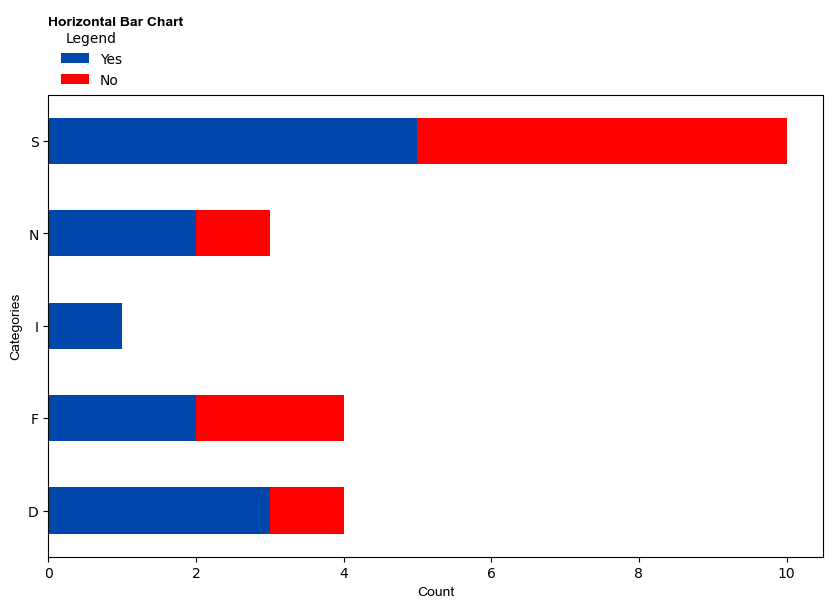

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
bar_data = pd.read_csv("bar_assignment.csv")

# Ensure all columns except the first are numeric (0/1)
bar_data.iloc[:, 1:] = bar_data.iloc[:, 1:].astype(int)

# Extract categories
categories = bar_data.iloc[:, 0].unique()

# Count "Yes" (1) and "No" (0) for each category
yes_counts = bar_data.groupby(bar_data.columns[0]).apply(lambda df: (df.iloc[:, 1:] == 1).sum().sum())
no_counts = bar_data.groupby(bar_data.columns[0]).apply(lambda df: (df.iloc[:, 1:] == 0).sum().sum())

# Ensure no NaN values
plot_data = pd.DataFrame({"Yes": yes_counts, "No": no_counts}).fillna(0)

# Define colors
colors = {"Yes": "#0047AB", "No": "#FF0000"}  # Cobalt Blue & Red

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked horizontal bar chart
plot_data.plot(kind="barh", stacked=True, ax=ax, color=[colors["Yes"], colors["No"]])

# Formatting
ax.set_title("Horizontal Bar Chart \n\n\n", loc="left", fontsize=10, fontweight="bold", pad=20, fontname="Arial")
ax.set_xlabel("Count", fontsize=10, fontname="Arial")
ax.set_ylabel("Categories", fontsize=10, fontname="Arial")

# Set x-axis increments to 2, extending up to the highest count
max_count = plot_data.sum(axis=1).max()
ax.set_xticks(range(0, int(max_count) + 2, 2))
ax.tick_params(axis="both", labelsize=10)  # Ensure all labels match Sankey's font size

# Create Legend
legend = ax.legend(
    title="\nLegend",
    loc="upper left",
    bbox_to_anchor=(0, 1.2),
    frameon=False,
    fontsize=10,
    title_fontsize=10
)

def generate_bar_chart():
# Adjust layout for better spacing
    fig, ax = plt.subplots(figsize=(6, 4))
    plot_data.plot(kind="barh", stacked=True, ax=ax, color=[colors["Yes"], colors["No"]])

    
    plt.close(fig)  # Prevent it from displaying automatically
    return fig  # Return the figure instead of displaying it
